In [1]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)

c:\Users\shifttech\Desktop\Univ_M\AV\Tp\sign_Lang\.venv\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.25.2 and <2.6.0 is required for this version of SciPy (detected version 1.24.3)
  from scipy.stats import gaussian_kde


ModuleNotFoundError: No module named 'numpy.exceptions'

In [17]:
# 2️⃣ Load and Explore the Dataset
df = pd.read_csv("../data/diabetes_prediction_dataset.csv")  # 🔸 Replace with your actual file path

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

✅ Dataset loaded successfully!
Shape: (100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [18]:
# Basic data info
print("\n--- Data Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Duplicate Rows ---")
print("Duplicates:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

--- Missing Values ---
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes            

C:\Users\shifttech\AppData\Local\Temp\ipykernel_2468\1505862420.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diabetes", data=df, palette="pastel")


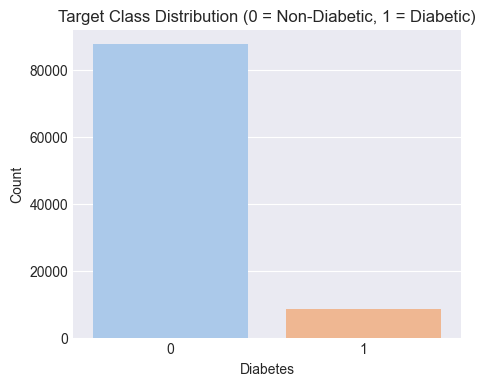

diabetes
0    91.178
1     8.822
Name: proportion, dtype: float64


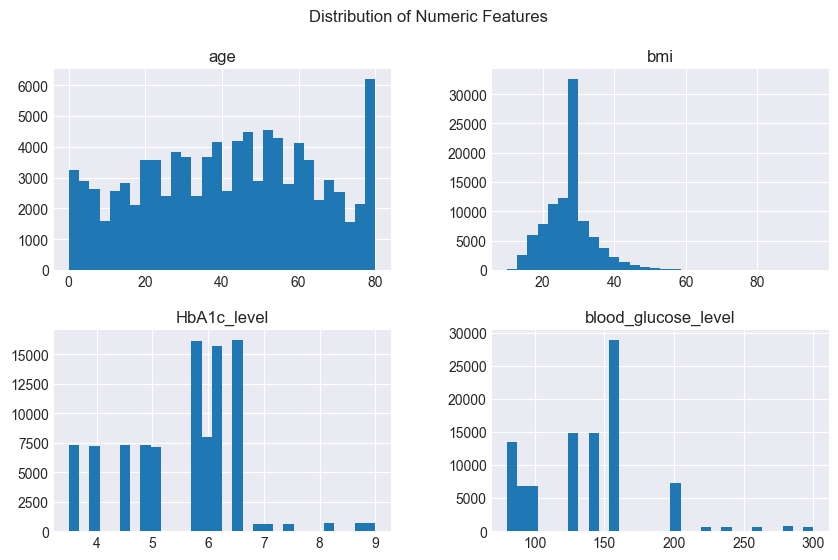

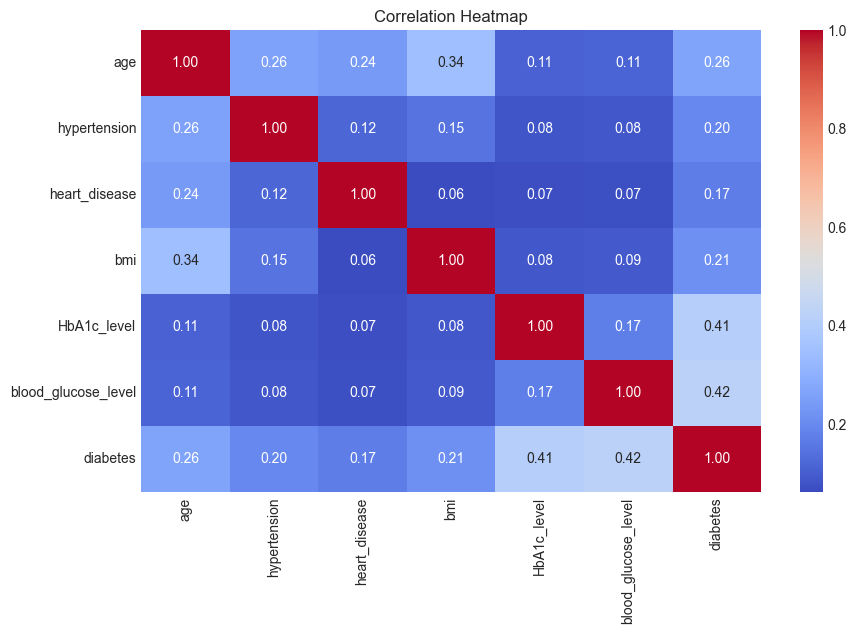

In [19]:
# 3️⃣ Exploratory Data Analysis (EDA)
plt.style.use("seaborn-v0_8-darkgrid")

# --- Target balance ---
plt.figure(figsize=(5, 4))
sns.countplot(x="diabetes", data=df, palette="pastel")
plt.title("Target Class Distribution (0 = Non-Diabetic, 1 = Diabetic)")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

print(df["diabetes"].value_counts(normalize=True) * 100)

# --- Numeric distributions ---
numeric_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
df[numeric_features].hist(bins=30, figsize=(10, 6), color="#1f77b4")
plt.suptitle("Distribution of Numeric Features")
plt.show()

# --- Correlation heatmap ---
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# 4️⃣ Encode Categorical Variables
categorical_cols = ["gender", "smoking_history"]

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

gender_encoder = LabelEncoder()
df["gender"] = gender_encoder.fit_transform(df["gender"])

df = pd.get_dummies(df, columns=["smoking_history"], drop_first=True)

print("\n✅ Categorical variables encoded successfully!")
print(df.head())

gender: ['Female' 'Male' 'Other']
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']

✅ Categorical variables encoded successfully!
   gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0       0  80.0             0              1  25.19          6.6   
1       0  54.0             0              0  27.32          6.6   
2       1  28.0             0              0  27.32          5.7   
3       0  36.0             0              0  23.45          5.0   
4       1  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  smoking_history_current  \
0                  140         0                    False   
1                   80         0                    False   
2                  158         0                    False   
3                  155         0                     True   
4                  155         0                     True   

   smoking_history_ever  smoking_history_former  smoking_history_n

In [21]:
# 5️⃣ Split Data (70% Train, 20% Test, 10% Validation)
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

# 70% train, 30% temporary
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split 30% into 20% test, 10% validation
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=(1 / 3), random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}, Validation: {X_val.shape}")

Train: (67302, 12), Test: (19229, 12), Validation: (9615, 12)


In [22]:
# 6️⃣ Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [23]:
# 7️⃣ Train Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
log_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
# 8️⃣ Evaluate the Model
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)
y_val_pred = log_model.predict(X_val_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("\n--- Accuracy Scores ---")
print(f"Training Accuracy:   {train_acc:.4f}")
print(f"Testing Accuracy:    {test_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

print("\n--- Classification Report (Validation) ---")
print(classification_report(y_val, y_val_pred))


--- Accuracy Scores ---
Training Accuracy:   0.8879
Testing Accuracy:    0.8835
Validation Accuracy: 0.8845

--- Classification Report (Validation) ---
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      8767
           1       0.43      0.88      0.57       848

    accuracy                           0.88      9615
   macro avg       0.71      0.88      0.75      9615
weighted avg       0.94      0.88      0.90      9615



ROC-AUC (Validation): 0.9630


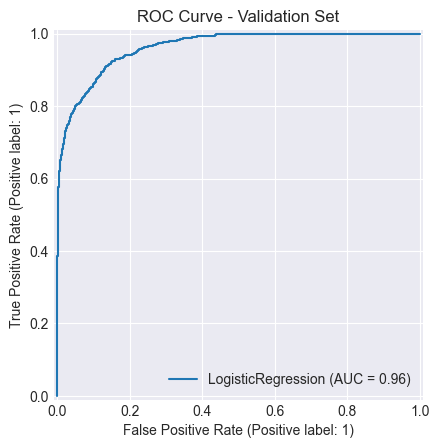

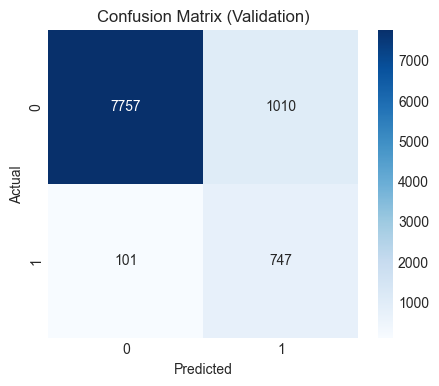

In [25]:
# 9️⃣ ROC-AUC and Confusion Matrix
y_val_proba = log_model.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"ROC-AUC (Validation): {roc_auc:.4f}")

RocCurveDisplay.from_estimator(log_model, X_val_scaled, y_val)
plt.title("ROC Curve - Validation Set")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation)")
plt.show()

C:\Users\shifttech\AppData\Local\Temp\ipykernel_2468\1219828279.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x="Coefficient", y="Feature", palette="coolwarm")


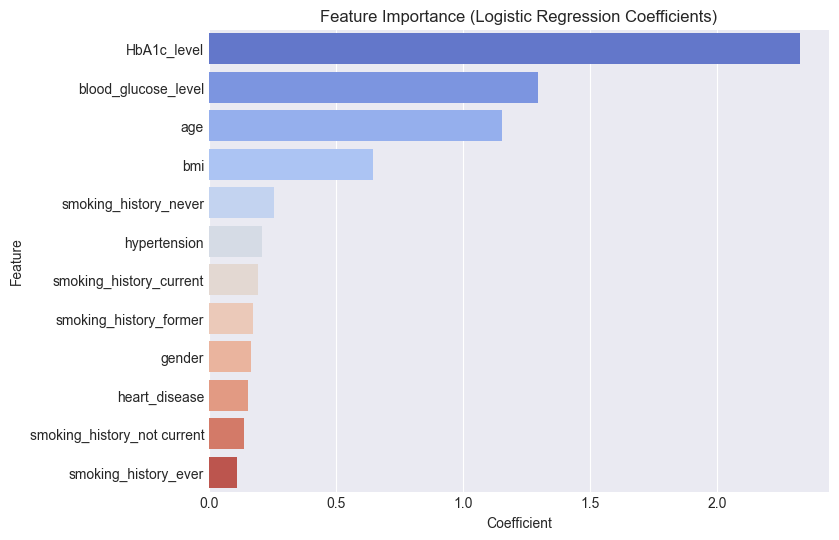

In [26]:
# 🔟 Feature Importance
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=importance, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

In [27]:
# ✅ Summary
print("\n✅ Logistic Regression model training complete!")
print(f"Training Accuracy:   {train_acc:.4f}")
print(f"Testing Accuracy:    {test_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation ROC-AUC:  {roc_auc:.4f}")


✅ Logistic Regression model training complete!
Training Accuracy:   0.8879
Testing Accuracy:    0.8835
Validation Accuracy: 0.8845
Validation ROC-AUC:  0.9630


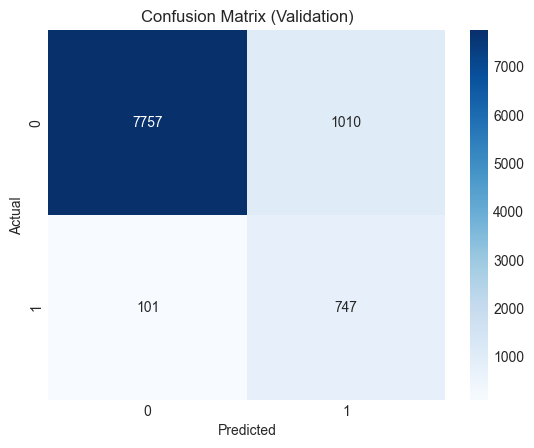

In [31]:
sns.heatmap(confusion_matrix(y_val, y_val_pred),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation)")
plt.show()
